In [1]:
from bs4 import BeautifulSoup
import requests

year = []
title = []
singer = []
score = []
making = []
distribution = []

# 가온차트 사이트에서 2018, 2019, 2020년 이 3년만 점수를 제공한다.
for i in range(3):
    site = 'http://gaonchart.co.kr/main/section/chart/online.gaon?nationGbn=T&serviceGbn=ALL&termGbn=year&hitYear={0}'.format(2020-i)
    req = requests.get(site)
    html = req.text
    soup = BeautifulSoup(html, 'html.parser')

    for j in range(100):
        year.append(2020 - i)
    
    # 노래 제목, 가수 이름
    songs = soup.select('td.subject > p')
    for idx, song in enumerate(songs):
        if idx > 199:
            break

        if idx % 2 == 0:
            title.append(song.get('title'))
        else:
            singer.append(song.get('title').split(' | ')[0])
        
    # 음반 점수
    record_score = soup.select('td.count > p')
    for idx, sco in enumerate(record_score):
        if idx > 99:
            break
            
        part_score = sco.text.split(',')
        part_sco = ''
        for part in part_score:
            part_sco += part
            
        score.append(int(part_sco)/10000)   

    # 제작사
    make = soup.select('td.production > p.pro')
    for idx, ma in enumerate(make):
        if idx > 99:
            break
            
        making.append(ma.get('title'))

    # 유통사
    ditribute = soup.select('td.production > p.dist')
    for idx, dist in enumerate(ditribute):
        if idx > 99:
            break
            
        distribution.append(dist.get('title'))

상위 10곡중 2018년도 곡:  21
상위 10곡중 2019년도 곡:  18
상위 10곡중 2020년도 곡:  1


Text(0, 0.5, 'count')

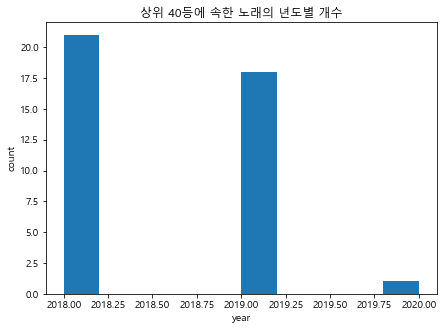

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')

song_df = pd.DataFrame({
    'title': title,
    'singer': singer,
    'score': score,
    'year': year,
    'making': making,
    'distribution': distribution
})

sort_song_df = song_df.sort_values(by = 'score', axis = 0, ascending = False)
#print(sort_song_df.head(n = 40))
print('상위 10곡중 2018년도 곡: ', len(sort_song_df.head(n = 40)[sort_song_df.head(n = 40)['year'] == 2018]))
print('상위 10곡중 2019년도 곡: ',len(sort_song_df.head(n = 40)[sort_song_df.head(n = 40)['year'] == 2019]))
print('상위 10곡중 2020년도 곡: ',len(sort_song_df.head(n = 40)[sort_song_df.head(n = 40)['year'] == 2020]))

fig = plt.figure(figsize = (7, 5))
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(sort_song_df.head(n = 40)['year'])
axes1.set_title('상위 40등에 속한 노래의 년도별 개수')
axes1.set_xlabel('year')
axes1.set_ylabel('count')

# 위 그래프는 총 음원데이터를 점수를 기준으로 정렬하여 상위 40개의 음원만 추출한 것이다. 
# 위 40개의 노래 중에 2020년도 곡은 단 1개 존재하며 2018년도 21곡, 2019년도 18곡으로 이루어져 있는 것으로 보아
# 작년, 재작년의 음악시장이 올해보다 더 컸음을 알 수 있다.

count      100.000000
mean     23596.586787
std      11205.347079
min      12526.800500
25%      15859.969425
50%      20021.492450
75%      28493.946025
max      73632.034700
Name: score, dtype: float64
count       100.000000
mean      51735.874030
std       17972.514284
min       29078.955500
25%       36471.134675
50%       49509.150000
75%       59850.808375
max      105337.119800
Name: score, dtype: float64
count       100.000000
mean      54578.450108
std       19585.562141
min       32297.922800
25%       39281.078825
50%       49202.852200
75%       63478.822000
max      123292.861000
Name: score, dtype: float64


Text(0, 0.5, 'year')

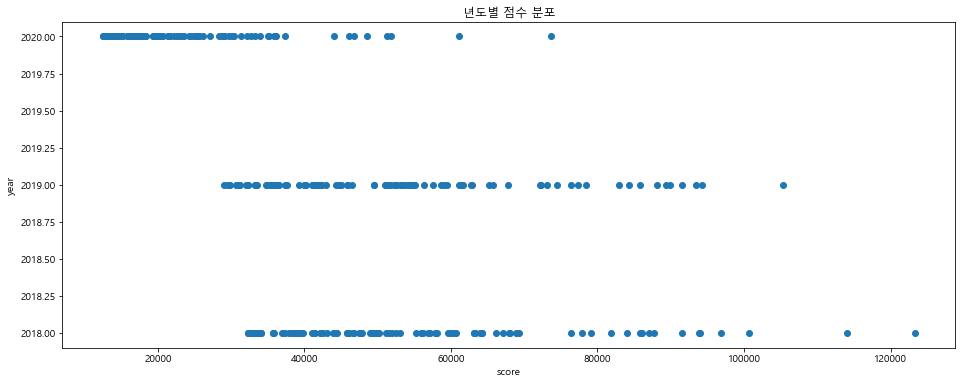

In [3]:
print(song_df[song_df['year'] == 2020]['score'].describe())
print(song_df[song_df['year'] == 2019]['score'].describe())
print(song_df[song_df['year'] == 2018]['score'].describe())

fig = plt.figure(figsize = (16, 6))
axes1 = fig.add_subplot(1, 1, 1)
axes1.scatter(sort_song_df.iloc[:]['score'], sort_song_df.iloc[:]['year'])
axes1.set_title('년도별 점수 분포')
axes1.set_xlabel('score')
axes1.set_ylabel('year')

# 위 그래프는 년도 별 점수의 분포를 나타낸다. 
# 2018년도에서 12만에서 3만으로 가장 넓게 분포하고 있으며 2019, 2020년도가 뒤를 잇는다.
# 3년 모두 최상위 1, 2곡을 제외한 나머지는 중위 ~ 하위권에 머물고 있으며 중위권보다 하위권에 훨씬 밀집되어 있다.
# 2018년도가 다른 년도에 비해 전체적으로 높은 부분에서 점수를 형성하고 있음으로 보아
# 3개년도 중에 가장 활발한 음악활동을 한 년도임을 알 수 있다.

Text(0, 0.5, 'score')

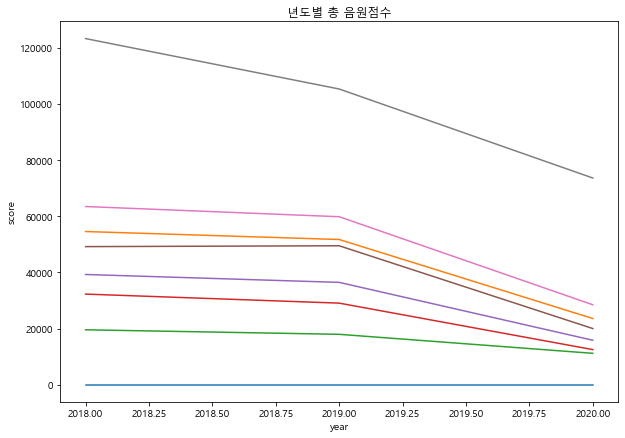

In [4]:
year_score = song_df.groupby('year')['score'].describe()

fig = plt.figure(figsize = (10, 7))
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(year_score)
axes1.set_title('년도별 총 음원점수')
axes1.set_xlabel('year')
axes1.set_ylabel('score')

# 위 그래프는 년도 별 총 음원점수를 나타낸다.
# 2018년에서 2019년까지는 점수가 아주 약간씩 하락하는 추세였지만 2019년 전반기부터 시작해서 2020년까지는 큰 폭으로 하락하고 있다.
# 코로나 바이러스로 인해 pc나 스마트폰 사용이 많아져서 음악시장이 더 활성화 되지 않았을까? 라는 생각을 했지만 아니었다.
# 그 이유는 코로나 바이러스가 없었던 때에도 음악을 사람들이 평소에 많이 찾아 들었을 것이며
# 코로나 바이러스로 인해 수많은 공연들이 전부 취소가 되는 사태에 따른 여파인 것을 추측할 수 있다.

Text(0, 0.5, 'score')

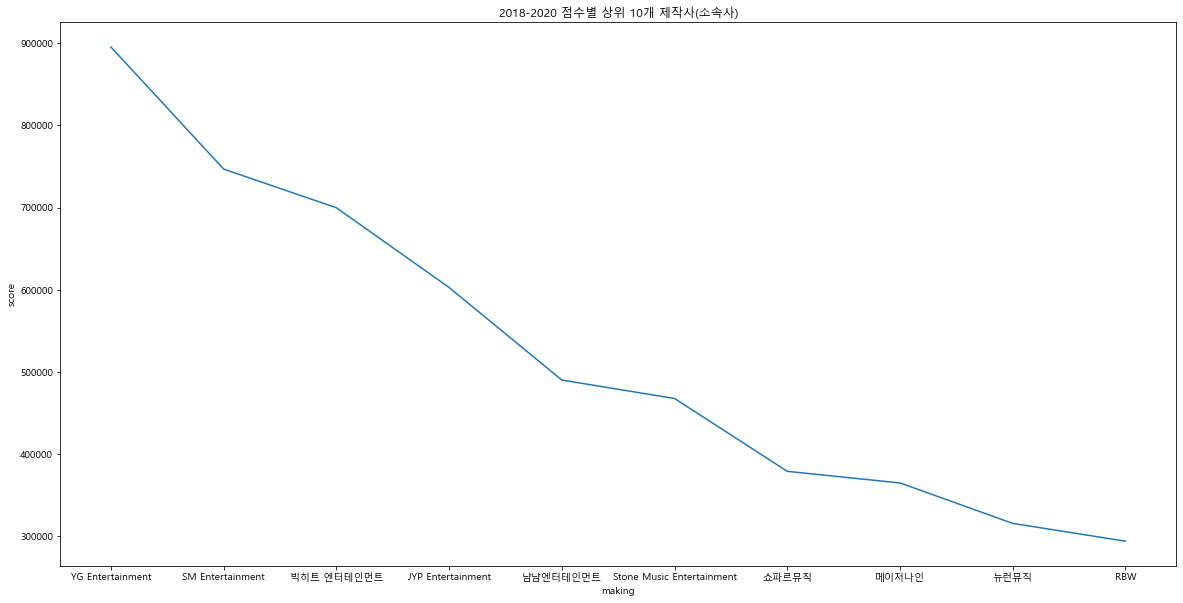

In [5]:
making_score = song_df.groupby('making')['score'].sum()
#print(making_score)
mean_making_score = making_score[making_score > making_score.mean()]
#print(mean_making_score)
sort_mean_making_score = mean_making_score.sort_values(ascending = False)
#print(sort_mean_making_score[0:5])

fig = plt.figure(figsize = (20, 10))
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(sort_mean_making_score[0:10])
axes1.set_title('2018-2020 점수별 상위 10개 제작사(소속사)')
axes1.set_xlabel('making')
axes1.set_ylabel('score')

# 위 그래프는 점수를 기준으로 상위 10개의 제작사를 추출한 것이다. 
# 음반 제작사(소속사)의 경우 연예인 기획 대표 3사인 YG, SM, JYP가 1, 2, 4등을 차지했으며
# 방탄소년단의 소속사인 빅히트 언터테인먼트가 3등을 차지했다.
# 3에서 4등 이후부터는 가파르게 감소하는 것을 보아 상위 10개 소속사에서도 격차가 큰 것을 알 수 있다.

(15,)
(4,)


Text(0, 0.5, 'score')

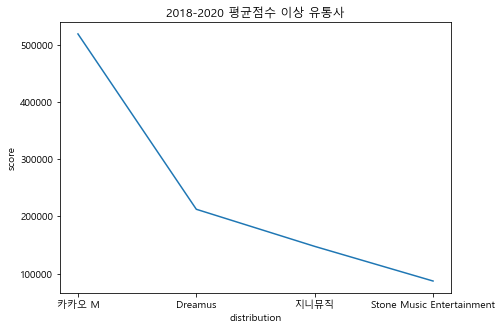

In [6]:
distribution_score = song_df.groupby('distribution')['score'].sum() / 10
print(distribution_score.shape)
mean_distribution_score = distribution_score[distribution_score>distribution_score.mean()]
print(mean_distribution_score.shape)
sort_mean_distribution_score = mean_distribution_score.sort_values(ascending = False)

fig = plt.figure(figsize = (7, 5))
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(sort_mean_distribution_score)
axes1.set_title('2018-2020 평균점수 이상 유통사')
axes1.set_xlabel('distribution')
axes1.set_ylabel('score')

# 위 그래프는 음반 유통사들 중에 점수가 평균 이상인 유통사만을 추출한 그래프이다.
# 2018-2020년도 대한민국 음반 유통사의 경우 15곳이 등장하며 이중에 평균 이상인 유통사만 추출했을 경우 4곳이 등장한다.
# 카카오 M이 대한민국 음반 유통사 중에 압도적으로 1위이며 그 뒤를 Dreamus, 지니뮤직, Stone Music Entertainment가 따르고 있다.
# 음반 유통사의 경우 상위 몇 개의 유통사가 시장의 대부분을 차지하는 것을 알 수 있다.

Text(0, 0.5, 'score')

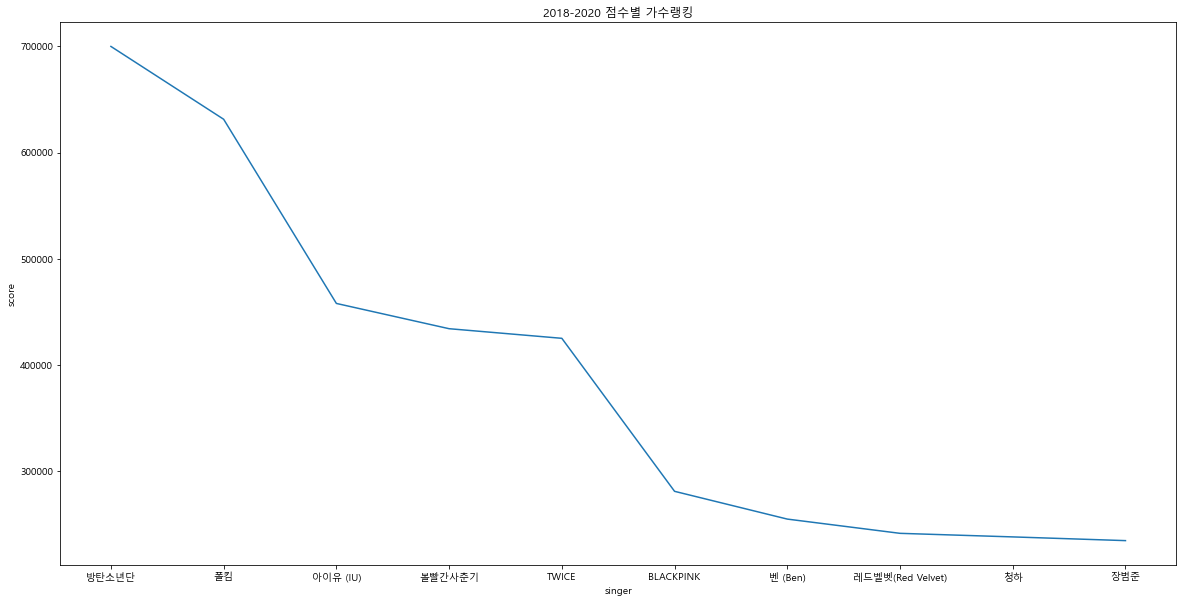

In [7]:
singer_score = song_df.groupby('singer')['score'].sum()
#print(len(singer_score))
mean_singer_score = singer_score[singer_score > singer_score.mean()]
#print(len(mean_singer_score))
sort_mean_singer_score = mean_singer_score.sort_values(ascending = False)
#print(sort_mean_singer_score[:10])

fig = plt.figure(figsize = (20, 10))
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(sort_mean_singer_score[:10])
axes1.set_title('2018-2020 점수별 가수랭킹')
axes1.set_xlabel('singer')
axes1.set_ylabel('score')

# 위 그래프는 3년동안에 가장 많은 점수를 얻은 가수(그룹)을 나타낸다. 개인적으로 가장 궁금했던 것이 가수(그룹) 랭킹이다.
# 국내만 아니라 해외에서도 인기가 많은 방탄소년단이 1위이며 그 뒤를 폴킴, 아이유, 볼빨간사춘기가 뒤따르고 있다.
# 5등 TWICE 이후로는 급격하게 점수가 떨어지는 것으로 보아 상위 5등정도만이 확실하게 팬덤이 강한 것을 알 수 있다.

singer
방탄소년단               18
폴킴                  12
아이유 (IU)            12
볼빨간사춘기              10
TWICE                9
태연 (TAEYEON)         6
BLACKPINK            5
레드벨벳(Red Velvet)     5
멜로망스(MeloMance)      5
벤 (Ben)              5
Name: title, dtype: int64


Text(0, 0.5, 'song count')

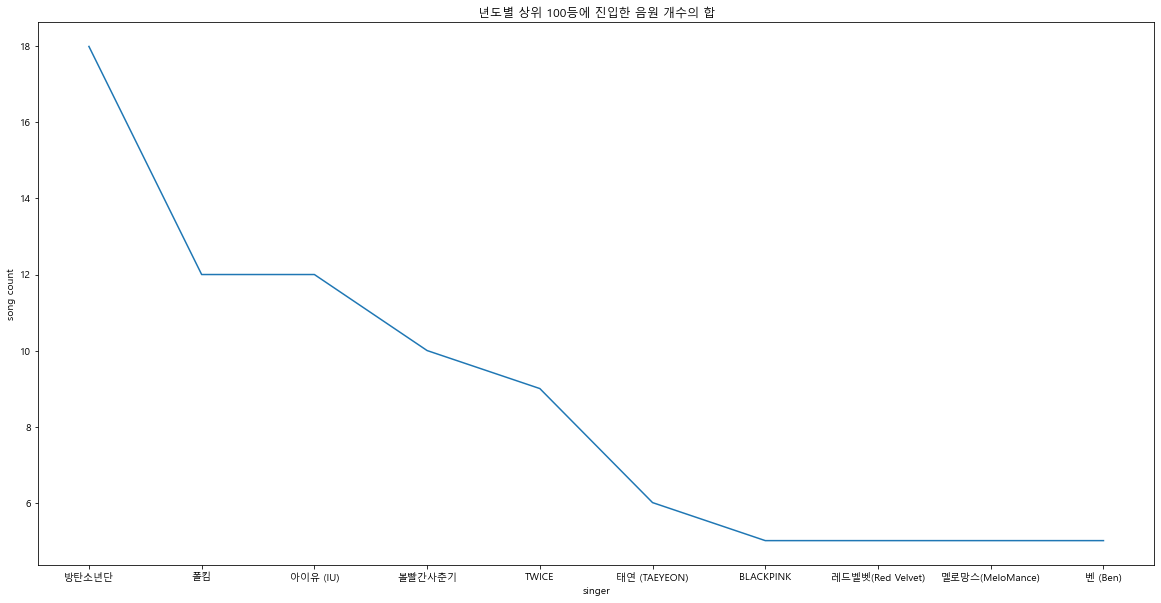

In [8]:
singer_count = song_df.groupby('singer')['title'].count()
#print(singer_count)
mean_singer_count = singer_count[singer_count > singer_count.mean()]
#print(len(mean_singer_count))
sort_mean_singer_count = mean_singer_count.sort_values(ascending = False)
print(sort_mean_singer_count[:10])

fig = plt.figure(figsize = (20, 10))
axes1 = fig.add_subplot(1, 1, 1)
axes1.plot(sort_mean_singer_count[:10])
axes1.set_title('년도별 상위 100등에 진입한 음원 개수의 합')
axes1.set_xlabel('singer')
axes1.set_ylabel('song count')

# 위 그래프는 년도 별 상위 100등에 진입한 음원개수가 가장 많은 가수들을 나타낸다.
# 방탄소년단이 18개를 진입시킨 것으로 가장 압도적으로 많으며 그 뒤를 폴킴 12개, 아이유 12개, 볼빨간사춘기 10개가 뒤따르고 있다.

In [9]:
sort_mean_singer_score_list = sort_mean_singer_score[0:10].index
sort_mean_singer_count_list = sort_mean_singer_count[0:10].index

singer_cnt = 0
for i in range(10):
    for j in range(10):
        if sort_mean_singer_score_list[i] == sort_mean_singer_count_list[j]:
            print(sort_mean_singer_score_list[i])
            singer_cnt += 1
            break
            
print(singer_cnt)

# 위 두그래프를 통해서 가수(그룹)랭킹과 100위권 내에 진입한 음원개수의 합이 어느정도 연관관계가 있음을 알 수 있다.
# 방탄소년단, 폴킴, 아이유, 볼빨간사춘기, TWICE, BLACKPINK, 벤, 레드벨벳 이렇게 8개의 가수(그룹)가 중복으로 나오는 것으로 보아
# 음원을 많이 내고 활동을 열심히 하는 가수(그룹)일수록 팬덤이 강한 것을 알 수 있다.

방탄소년단
폴킴
아이유 (IU)
볼빨간사춘기
TWICE
BLACKPINK
벤 (Ben)
레드벨벳(Red Velvet)
8


In [10]:
# 응용 방향 설계
# 어떤 가수가 활발히 활동하고 팬덤이 강한지, 우리나라의 제작사, 유통사의 시장 순위는 어떻게 되는지 음원사이트를 분석해보았다.
# 위 데이터들을 통해 대한민국의 음원시장이 어떻게 돌아가는지 파악할 수 있었다.

# 음원시장에서 활발하게 활동하고 있는 제작사(소속사), 유통사의 순위와 추이를 보여주는 웹사이트를 제작한다.
# 음악을 업으로 하는 사람들은 위 데이터를 참고하여 자신이 지원할 소속사들에 대한 정보를 얻을 수 있고,
# 음악을 취미로 하는 사람들은 음반을 제작할 때 어떤 유통사를 통해서 제작하는 것이 효율적이고 파격성이 큰지에 대한 정보를 얻을 수 있다.
# 또한 위 데이터들을 가지고 앞으로 음원시장에 자본을 투자할 때 어느 기업에 투자할 것인지 참고할 수 있다.

# 웹으로 데이터를 제공하기 때문에 사용자들이 한눈에 보기 편하고, 쉽게 접근할 수 있는 UI/UX를 디자인하는 프론트엔드,
# 사용자로부터 정보를 입력 받고 처리하기 위한 백엔드(서버), 입력 받은 정보들을 저장하기 위한 DB가 필요하다.
#‘가온 차트’만 아니라 더 많은 데이터와 신뢰성을 확보하기 위해 다른 음원사이트에 대해서도 크롤링이 필요하다.

In [11]:
import numpy as np

# 점수를 가지고 2018년인지 2020년인지 예측

# train set 70%
X2020 = np.array(song_df.iloc[0:70, [2]])
y2020 = np.array(song_df.loc[0:69, ['year']])

X2018 = np.array(song_df.iloc[200:270, [2]])
y2018 = np.array(song_df.loc[200:269, ['year']])

X = np.concatenate((X2020, X2018), axis = 0)
y = np.concatenate((y2020, y2018), axis = 0)

# test set 30%
test_X2020 = np.array(song_df.iloc[70:100, [2]])
test_y2020 = np.array(song_df.loc[70:99, ['year']])

test_X2018 = np.array(song_df.iloc[270:300, [2]])
test_y2018 = np.array(song_df.loc[270:299, ['year']])

test_X = np.concatenate((test_X2020, test_X2018), axis = 0)
test_y = np.concatenate((test_X2020, test_y2018), axis = 0)

median_year = np.median(y)
class_y = [1 if i > median_year else 0 for i in y]
test_class_y = [1 if i > median_year else 0 for i in test_y]
#print(class_y)
#print(test_class_y)

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0).fit(X, class_y)
predicted_y = clf.predict(test_X)
#print(predicted_y)

predicted_prob_y = clf.predict_proba(test_X)
#print(predicted_prob_y)

clf.score(test_X, test_class_y)
# 정확도가 50% 밖에 되지 않는다.

0.5

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_class_y, predicted_y)
print(confusion_matrix)

# True인 레이블을 True로 판단한 경우가 30개
# False인 레이블을 True로 판단한 경우가 30개로
# 절반은 맞추고 절반은 틀렸다.

[[30  0]
 [30  0]]


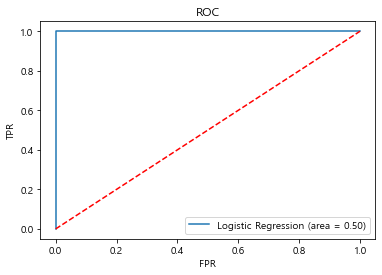

In [14]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(test_class_y, predicted_y)
fpr, tpr, thresholds = roc_curve(test_class_y, predicted_prob_y[:, 1])
#print(logit_roc_auc)
#print(predicted_prob_y[:, 0])

plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc = 'lower right')
plt.show()

In [15]:
# ROC curve의 면적인 AUC도 0.5로 위 모델은 점수와 년도 사이에 어떠한 상관관계도 찾아내지 못했음을 알 수 있다.

# 내가 크롤링한 데이터에서 사용가능한 수치 값은 노래에 대한 점수와 년도 단 두가지였다.
# 이 데이터를 통해 어떤 가수가 활발하게 활동하고 팬덤이 강한지, 어떤 제작사/유통사가 시장을 차지하고 있는지는 알 수 있었다.
# 그러나 로지스틱 회귀를 사용한 결과 점수를 통해서 년도를 예측하는 것은 어렵다는 결론이 나왔다.

# 그 이유는 첫째 내가 크롤링해서 추출한 데이터들 사이에는 상관관계가 없다.
# 지금 수집한 데이터를 토대로 점수를 사용해서 년도를 예측한다는 것 자체가 말이 되지 않는다.
# 해당 년도에 어떤 곡을 얼마나 들었는지에 대한 척도가 점수일 뿐이지 그 점수가 년도를 추론할 수 있는 특성일 수가 없다는 것이다.

# 둘째 특성이 너무 적다.
# 점수도 년도와 상관관계가 없는 것이 거의 확실하기 때문에 특성으로 사용하면 안 되지만
# 내가 크롤링해서 추출한 데이터에서 사용가능한 의미 있는 값이 이거 하나여서 가져왔다.
# 상관관계도 없는데 특성도 하나이기 때문에 제대로 된 학습을 기대할 수 없다.

# 처음에 크롤링을 하기 전에 내가 어떤 상관관계가 있는 데이터를 수집해서 어떤 분석을 할 것인지에 대한 설계가 부족했던 것 같다.
# 이번 실습을 통해서 모델을 학습시킬 때는 데이터 사이에 상관관계가 있을 만한 데이터를 수집해서 분석해야 하며
# 데이터가 가장 중요하다는 것을 다시한번 느꼈다.